# ROLL NO: CB.SC.P2DSC23023
# DLVR ASSIGNMENT - 2

## Select any of the open-source signal/image dataset

<h4> I have selected <b>Weather</b> dataset. </h4>

### ABOUT THE DATASET

In [1]:
# Importing necessary libraries

import os  # Operating system module for accessing local files
import itertools  # Tools for iterations

# Importing Data manipulation Libraries
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  

# Importing Libraries required for deep learning model
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3  # Module for Inception model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import Xception  # Module for Exception model

# Importing Library for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# For Evaluating models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

C:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Actual dataset path

dataset_path = "Climate_Dataset/"

In [3]:
# Reading classes and corresponding number of images from the dataset

class_folders = os.listdir(dataset_path)
count = 1  # Count for calculating number of classes

for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        print(f"class {count}: {class_folder}, Number of images: {len(images)}")
    count += 1

class 1: cloudy, Number of images: 300
class 2: rain, Number of images: 215
class 3: shine, Number of images: 253
class 4: sunrise, Number of images: 357


In [4]:
# This function automatically loads images from the directory, resizes them to a uniform size

data = tf.keras.preprocessing.image_dataset_from_directory(dataset_path)

Found 1125 files belonging to 4 classes.


In [5]:
num_classes = len(data.class_names)
print('Number of Classes : {0}'.format(num_classes))

Number of Classes : 4


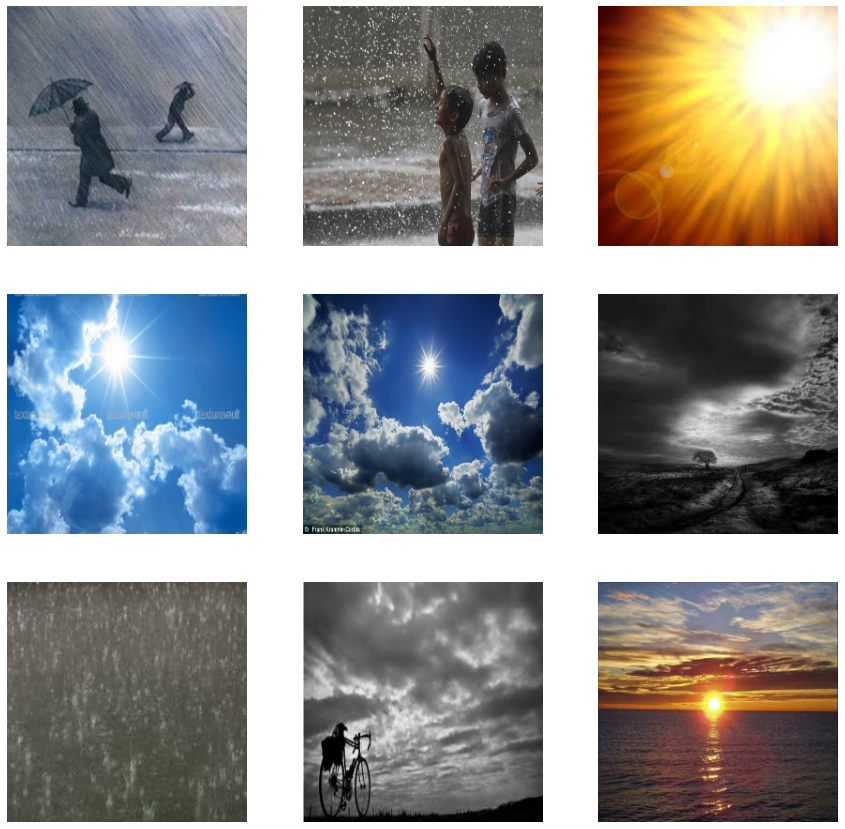

In [6]:
#Defing a function to see images
def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

#Plotting the images in dataset
show_img(data)

### IMAGE PREPROCESSING

In [7]:
# Creating an ImageDataGenerator and doing Image Augmentation

datagen = ImageDataGenerator(
        rescale = 1./255,  # Rescaling pixel values [0, 1]
        rotation_range=40,  # Random rotation of the image 
        width_shift_range=0.2,  # Random horizontal shifting of the image 
        height_shift_range=0.2,  # Random vertical shifting of the image 
        shear_range=0.2,  # For geometric transformations
        zoom_range=0.2,  # Random zooming of the image
        horizontal_flip=True,  # Randomly flipping the image horizontally
        fill_mode='nearest',  # For filling in newly created pixels
        validation_split = 0.2)  # validation size

### SPLITTING TRAINING AND VALIDATION DATA

In [8]:
# Providing Image parameters
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [9]:
# Training Data 
train_data = datagen.flow_from_directory(
    dataset_path,  
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',  # Encoding labels as categorical one-hot vectors
    subset = 'training')  # Generating data subset for training

# Validation Data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation',  # Generating data subset for validation
    shuffle = False)  # Not shuffling the data during validation

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


## Apply the transfer learning approach using the standard architectures: Inception and Exception.

### IMPLEMENTING INCEPTION MODEL

In [10]:
# loading pre-trained InceptionV3 Model
pre_trained_inception = InceptionV3(
    weights='imagenet',  # Using pre trained weights trained on ImageNet dataset                   
    include_top=False,  # Excluding the fully-connected layers at the top of the network
    input_shape=img_shape,  # Specifying the image shape
    pooling='avg'  # Average pooling for reducing spacial dimensions
)

for layer in pre_trained_inception.layers:
    layer.trainable = False  # Setting trainable parameter to False to freeze the weights of the layers

In [11]:
# Defining Layers on the top of the pre-trained Inception model
x = pre_trained_inception.output  # Output from the pre-trained model
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)  # To normalize activations of the previous layer
x = Dropout(0.2)(x)  # To prevent overfitting
x = Dense(1024, activation='relu')(x)  # Adding FC and ReLU activation function
x = Dropout(0.2)(x)  
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation function

model = Model(inputs = pre_trained_inception.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])  # Compiling the model 

In [12]:
# Displaying the summary of the inception architecture
model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 228, 228, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 113, 113, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 113, 113, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 26, 26, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 26, 26, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 26, 26, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 26, 26, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 26, 26, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 26, 26, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 26, 26, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 26, 26, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 26, 26, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 26, 26, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [13]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size  # Calculating Step Size for train data
STEP_SIZE_VALID = val_data.n // val_data.batch_size  # Calculating Step Size for validation data

# Training the model
history = model.fit(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 15,
                    verbose = 1)

Epoch 1/15


28/28 [==============================] - 37s 1s/step - loss: 0.6085 - accuracy: 0.8481 - val_loss: 0.4943 - val_accuracy: 0.8348
Epoch 2/15
28/28 [==============================] - 29s 1s/step - loss: 0.4378 - accuracy: 0.9125 - val_loss: 0.5474 - val_accuracy: 0.8393
Epoch 3/15
28/28 [==============================] - 29s 1s/step - loss: 0.2971 - accuracy: 0.9264 - val_loss: 0.3232 - val_accuracy: 0.8795
Epoch 4/15
28/28 [==============================] - 29s 1s/step - loss: 0.4176 - accuracy: 0.9148 - val_loss: 0.3401 - val_accuracy: 0.8929
Epoch 5/15
28/28 [==============================] - 28s 999ms/step - loss: 0.3013 - accuracy: 0.9310 - val_loss: 0.3142 - val_accuracy: 0.9018
Epoch 6/15
28/28 [==============================] - 28s 1s/step - loss: 0.2299 - accuracy: 0.9436 - val_loss: 0.3920 - val_accuracy: 0.8973
Epoch 7/15
28/28 [==============================] - 29s 1s/step - loss: 0.1919 - accuracy: 0.9413 - val_loss: 0.3122 - val_accuracy: 0.9018
Epoch 8/15
28/2

### VISUALIZING ACCURACY AND LOSSES DURING TRAINING ON INCEPTION

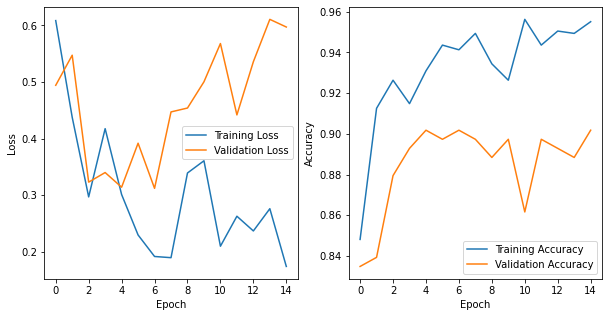

In [14]:
# Plotting Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### TESTING INCEPTION MODEL

In [15]:
# Extracting class labels from the class indeces
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [16]:
def predict_image(filename, model):
    # Loading and preprocessing the image
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    prediction = model.predict(img_processed)  # Make prediction using the model
    index = np.argmax(prediction)  # Getting index of the predicted class
    # Displaying the predicted image
    plt.title("Object Detected As - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 1s 1s/step


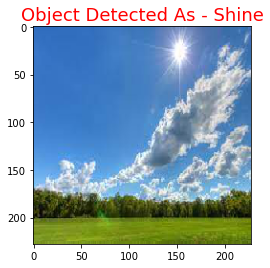

In [17]:
# Giving test image to test the prediction
predict_image("test_images/shine_test.jpeg", model)

1/1 [==============================] - 0s 60ms/step


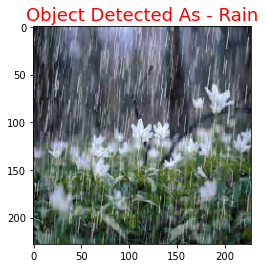

In [18]:
# Test image 2
predict_image('test_images/rain_test.jpeg', model)

1/1 [==============================] - 0s 75ms/step


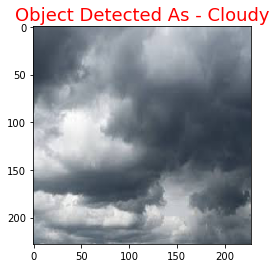

In [19]:
# Test image 3
predict_image('test_images/cloudy_test.jpeg', model)

1/1 [==============================] - 0s 63ms/step


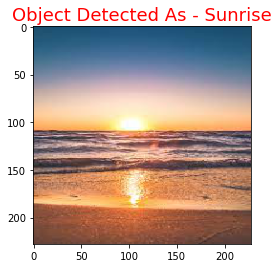

In [20]:
# Test image 4
predict_image('test_images/sunrise_test.jpeg', model)

## standard performance measures to evaluate the performance of the Inception model.

In [21]:
# Evaluation on Validation Set

val_data.reset()  # Reseting the generator to beginning of the dataset
y_val_true = val_data.classes  # True labels
y_val_pred_prob = model.predict(val_data)  # Predicted probabilities
y_val_pred = np.argmax(y_val_pred_prob, axis=1)  # Predicted labels

# Classification Report
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred, target_names=data.class_names))

# AUC calculation
auc = roc_auc_score(y_val_true, y_val_pred_prob, multi_class='ovr')
print("AUC: ", auc)

7/7 [==============================] - 7s 840ms/step
Classification Report:
              precision    recall  f1-score   support

      cloudy       0.87      0.68      0.77        60
        rain       0.95      0.95      0.95        43
       shine       0.71      0.92      0.80        50
     sunrise       0.99      0.96      0.97        71

    accuracy                           0.88       224
   macro avg       0.88      0.88      0.87       224
weighted avg       0.89      0.88      0.87       224

AUC:  0.9830100936811597


In [22]:
# Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred)

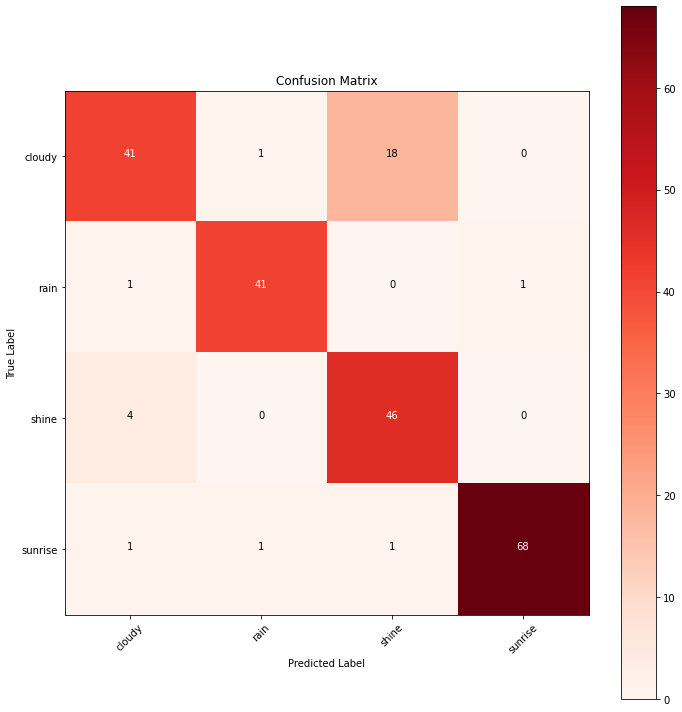

Confusion Matrix:
 [[41  1 18  0]
 [ 1 41  0  1]
 [ 4  0 46  0]
 [ 1  1  1 68]]


In [23]:
# Displaying the confusion Matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.class_names))
plt.xticks(tick_marks, data.class_names, rotation=45)
plt.yticks(tick_marks, data.class_names)

# Adding annotations to the confusion matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Displaying the confusion matrix as a matrix of values
print("Confusion Matrix:\n", cm)

### IMPLEMENTING EXCEPTION MODEL

In [24]:
# Loading pre-trained Xception
pre_trained_exception = Xception(
    weights='imagenet',  # Using pre trained weights trained on ImageNet dataset  
    include_top=False,  # Excluding the fully-connected layers at the top of the network
    input_shape=img_shape,  # Specifying the image shape
    pooling='avg'  # Average pooling for reducing spacial dimensions
)

for layer in pre_trained_exception.layers:
    layer.trainable = False  # Setting trainable parameter to False to freeze the weights of the layers

In [25]:
# Defining Layers on the top of the pre-trained Xception model
x = pre_trained_exception.output  # Output from the pre-trained model
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)  # To normalize activations of the previous layer
x = Dropout(0.2)(x)  # To prevent overfitting
x = Dense(1024, activation='relu')(x)  # Adding FC and ReLU activation function
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation function

In [26]:
model_x = Model(inputs=pre_trained_exception.input, outputs=predictions)
model_x.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])  # Compiling the model

In [27]:
# Displaying the summary of the Xception architecture
model_x.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 228, 228, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 113, 113, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 113, 113, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 113, 113, 32)         0         ['block1_conv1_bn[0][0]'

 ormalization)                                                                                    
                                                                                                  
 block4_sepconv2_act (Activ  (None, 28, 28, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 28, 28, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 28, 28, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
          

 ation)                                                                                           
                                                                                                  
 block7_sepconv1 (Separable  (None, 14, 14, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 14, 14, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 14, 14, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
          

 block9_sepconv3_bn (BatchN  (None, 14, 14, 728)          2912      ['block9_sepconv3[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                 (None, 14, 14, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_6[0][0]']               
                                                                                                  
 block10_sepconv1_act (Acti  (None, 14, 14, 728)          0         ['add_7[0][0]']               
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 14, 14, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D) 

                                                                                                  
 block12_sepconv3_act (Acti  (None, 14, 14, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 14, 14, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 14, 14, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_10 (A

In [28]:
# Calculating the step size for train and validation data
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

In [29]:
# Training the model
history = model_x.fit(train_data,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_data,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=15,
                    verbose=1)

Epoch 1/15
28/28 [==============================] - 51s 2s/step - loss: 0.9482 - accuracy: 0.7756 - val_loss: 0.4185 - val_accuracy: 0.8571
Epoch 2/15
28/28 [==============================] - 48s 2s/step - loss: 0.4583 - accuracy: 0.8861 - val_loss: 0.4511 - val_accuracy: 0.8304
Epoch 3/15
28/28 [==============================] - 47s 2s/step - loss: 0.4313 - accuracy: 0.8907 - val_loss: 0.3957 - val_accuracy: 0.8348
Epoch 4/15
28/28 [==============================] - 46s 2s/step - loss: 0.3486 - accuracy: 0.9079 - val_loss: 0.4800 - val_accuracy: 0.8036
Epoch 5/15
28/28 [==============================] - 50s 2s/step - loss: 0.3781 - accuracy: 0.9125 - val_loss: 0.3863 - val_accuracy: 0.8259
Epoch 6/15
28/28 [==============================] - 49s 2s/step - loss: 0.4090 - accuracy: 0.8941 - val_loss: 0.3741 - val_accuracy: 0.8348
Epoch 7/15
28/28 [==============================] - 47s 2s/step - loss: 0.4239 - accuracy: 0.9079 - val_loss: 0.3663 - val_accuracy: 0.8750
Epoch 8/15
28/28 [==

### VISUALIZING ACCURACY AND LOSSES DURING TRAINING ON EXCEPTION

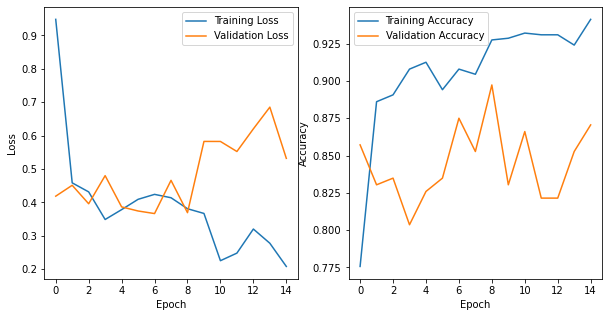

In [30]:
# Plotting Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### TESTING EXCEPTION MODEL

In [31]:
# Extracting class labels from the class indices
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [32]:
def predict_image(filename, model_x):
    # Loading and preprocessing the image
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    prediction = model_x.predict(img_processed)  # Make prediction using the model
    index = np.argmax(prediction)   # Getting index of the predicted class
    # Displaying the predicted image
    plt.title("Object Detected As - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 [==============================] - 1s 875ms/step


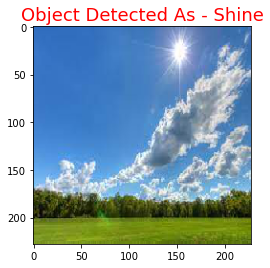

In [33]:
# Giving test image to test the prediction
predict_image("test_images/shine_test.jpeg", model_x)

1/1 [==============================] - 0s 85ms/step


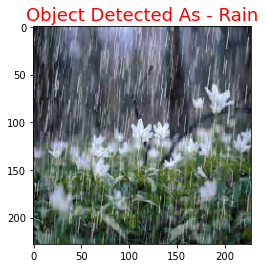

In [34]:
# Test Image 2
predict_image('test_images/rain_test.jpeg', model_x)

1/1 [==============================] - 0s 144ms/step


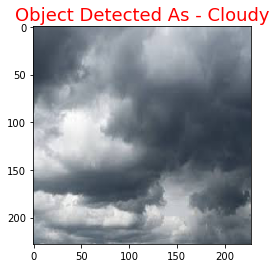

In [35]:
# Test Image 3
predict_image('test_images/cloudy_test.jpeg', model_x)

1/1 [==============================] - 0s 95ms/step


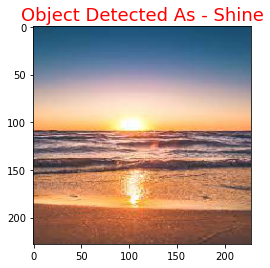

In [36]:
# Test Image 4
predict_image('test_images/sunrise_test.jpeg', model_x)

## standard performance measures to evaluate the performance of the Exception model.

In [37]:
# Evaluation on Validation Set

val_data.reset()  # Reseting the generator to beginning of the dataset
y_val_true = val_data.classes  # True labels
y_val_pred_prob = model_x.predict(val_data)  # Predicted probabilities
y_val_pred = np.argmax(y_val_pred_prob, axis=1)  # Predicted labels

# Classification Report
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred, target_names=data.class_names))

# AUC calculation
auc = roc_auc_score(y_val_true, y_val_pred_prob, multi_class='ovr')
print("AUC: ", auc)

7/7 [==============================] - 11s 2s/step
Classification Report:
              precision    recall  f1-score   support

      cloudy       0.80      0.65      0.72        60
        rain       1.00      0.91      0.95        43
       shine       0.58      0.86      0.69        50
     sunrise       0.98      0.86      0.92        71

    accuracy                           0.81       224
   macro avg       0.84      0.82      0.82       224
weighted avg       0.85      0.81      0.82       224

AUC:  0.9638460615547659


In [38]:
# Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred)

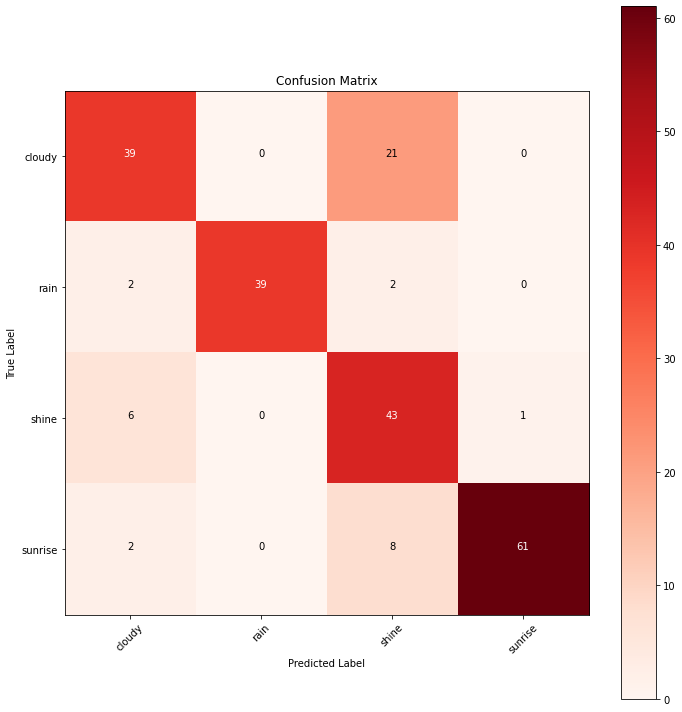

Confusion Matrix:
 [[39  0 21  0]
 [ 2 39  2  0]
 [ 6  0 43  1]
 [ 2  0  8 61]]


In [39]:
# Displaying the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(data.class_names))
plt.xticks(tick_marks, data.class_names, rotation=45)
plt.yticks(tick_marks, data.class_names)

# Adding annotations to the confusion matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Displaying the confusion matrix as a matrix of values
print("Confusion Matrix:\n", cm)

## Compare the performance measures for the two architectures used. Present your inference with justifications.

<h2><u>INCEPTION MODEL</u></h2>
<p>The model is already pre-trained on ImageNet dataset, we are using the trained weights from the ImageNet dataset</p>
<p><b>THE HYPER PARAMETERS USED ARE:</b></p>
<ul>
    <li>No.of Epochs: 15</li>
    <li>Dropout Rate: 0.2</li>
    <li>Batch Normalization: (axis=-1, momentum=0.99, epsilon=0.001)</li>
    <li>Learning Rate: 0.001</li>
    <li>Activation Function: ReLU and Softmax</li>
    <li>Loss Function: Categorical Cross Entropy</li>
    <li>Optimizer: Adam</li>
</ul>

<h3>EVALUATION METRICES</h3>
<ul>
    <li><b>ACCURACY: 88%</b></li>
    <li><b>PRECISION</b></li>
        <li>CLOUDY: 0.87</li>
        <li>RAIN: 0.95</li>
        <li>SHINE: 0.71</li>
        <li>SUNRISE: 0.99</li>
    <li><b>RECALL</b></li>
        <li>CLOUDY: 0.68</li>
        <li>RAIN: 0.95</li>
        <li>SHINE: 0.92</li>
        <li>SUNRISE: 0.96</li>
    <li><b>F1-SCORE</b></li>
        <li>CLOUDY: 0.77</li>
        <li>RAIN: 0.95</li>
        <li>SHINE: 0.80</li>
        <li>SUNRISE: 0.97</li>
    <li><b>AUC: 0.983</b></li>    
</ul>
<p><b>CONFUSION MATRIX: </b></p>
<p>[[41  1  18  0]</p>
<p>[ 1 41  0  1]</p>
<p>[ 4  0 46  0]</p>
<p>[ 1  1  1 68]]</p>

<p>For <b>Accuracy</b> the overall accuracy of the model is 0.88, meaning that the model correctly predicts the class label for 88% of the samples.</p>
<p><b>Precision</b> is quite good for all classes, suggesting that model is effective in correctly identifying positive instances.</p>
<p><b>Recall</b> is also good for all classes, suggesting that the model classified most of the positive instances correctly</p>
<p><b>F1-Score</b> the weighted average F1-score is 0.88, indicating that the model has a good balance between precision and recall across all classes. This means the model is performing well in terms of both minimizing false positives and false negatives across the different classes in the dataset.</p>
<p><b>AUC</b> of 0.983 suggests that the model has very good discriminative ability, meaning it can effectively differentiate between the classes.</p>

<h4>During the training,</h4>
<p>The model loss and accuracy metrics are shown for each epoch, indicating how they changing over time. We observe that both training loss decrease over epochs, while accuracy increases. This suggests that the model is learning from the training data and improving its performance.</p>
<p>We can observe, that the validation accuracy is performed consistently good and The validation loss is also generally decreasing until 9th epoch, after that the validation loss starts increasing which suggests that the model is slightly overfitting to the training data.</p>
<p>We see the average time to train the model per epoch is 30 seconds and 1s per step</p>



<h2><u>EXCEPTION MODEL</u></h2>
<p>The model is already pre-trained on ImageNet dataset, we are using the trained weights from the ImageNet dataset</p>
<p><b>THE HYPER PARAMETERS USED ARE:</b></p>
<ul>
    <li>No.of Epochs: 15</li>
    <li>Dropout Rate: 0.2</li>
    <li>Batch Normalization: (axis=-1, momentum=0.99, epsilon=0.001)</li>
    <li>Learning Rate: 0.001</li>
    <li>Activation Function: ReLU and Softmax</li>
    <li>Loss Function: Categorical Cross Entropy</li>
    <li>Optimizer: Adam</li>
</ul>

<h3>EVALUATION METRICES</h3>
<ul>
    <li><b>ACCURACY: 81%</b></li>
    <li><b>PRECISION</b></li>
        <li>CLOUDY: 0.80</li>
        <li>RAIN: 1.00</li>
        <li>SHINE: 0.58</li>
        <li>SUNRISE: 0.98</li>
    <li><b>RECALL</b></li>
        <li>CLOUDY: 0.65</li>
        <li>RAIN: 0.91</li>
        <li>SHINE: 0.86</li>
        <li>SUNRISE: 0.86</li>
    <li><b>F1-SCORE</b></li>
        <li>CLOUDY: 0.72</li>
        <li>RAIN: 0.95</li>
        <li>SHINE: 0.69</li>
        <li>SUNRISE: 0.92</li>
    <li><b>AUC: 0.963</b></li>    
</ul>
<p><b>CONFUSION MATRIX: </b></p>
<p>[[39  0  21  0]</p>
<p>[ 2 39  2  0]</p>
<p>[ 6  0 43  1]</p>
<p>[ 2  0  8 61]]</p>

<p>For <b>Accuracy</b> the overall accuracy of the model is 0.81, meaning that the model almost correctly predicts the class label for 81% of the samples.</p>
<p><b>Precision</b> is quite good for all classes, suggesting that model is effective in correctly identifying positive instances.</p>
<p><b>Recall</b> is also good for all classes, suggesting that the model classified most of the positive instances correctly</p>
<p><b>F1-Score</b> the weighted average F1-score is 0.81, indicating that the model has a good balance between precision and recall across all classes. This means the model is performing well in terms of both minimizing false positives and false negatives across the different classes in the dataset.</p>
<p><b>AUC</b> of 0.963 suggests that the model has very good discriminative ability, meaning it can effectively differentiate between the classes.</p>

<h4>During the training,</h4>
<p>The model loss and accuracy metrics are shown for each epoch, indicating how they changing over time. We observe that training loss decrease over epochs, while accuracy increases. This suggests that the model is learning from the training data and improving its performance.</p>
<p>We can observe, that the validation accuracy is not consistent throughout the training process, and there seems to be increase in validation loss after 9th epoch, indicating possible overfitting of the model. This indicates that the model performance on unseen data is not improving, which is a sign of overfitting.</p>
<p>The accuracy for training increases with each epoch, which suggests that the model is learning and improving its performance.</p>
<p>We see the average time to train the model per epoch is 48 seconds</p>


<h2>OVERALL INFERENCE</h2>

<p>Upon considering all these metrices, the inference shows that, for the given data both model performs well, and we can see the model might have the potential of overfitting.</p>
<p>For Inception model, which is tested by giving 4 images. As of that, all the four images predicted correctly by the model.</p>
<p>For Exception model, which is also tested by giving 4 images. As of that, out of 4 images, three images predicted correctly, and one image was predicted wrong.</p>
<p>Considering these cases, we can clearly tell that, for the given weather data, Inception model performed better than the Exception model.</p>

## Extract the deep features and use at least 4 ML algorithms for classification

### FEATURE EXTRACTION FOR INCEPTION MODEL

In [40]:
# Defining the function to extract deep features from the pre-trained Inception model
def extract_deep_features(model, data_generator):
    features = []  # List to store the extracted features
    labels = []  # List to store the corresponding labels
    for inputs, labels_batch in data_generator:
        features_batch = model.predict(inputs)  # Predicting the features using model
        features.extend(features_batch)
        labels.extend(labels_batch)
        if len(features) >= len(data_generator):
            break  # Break the loop if the number of extracted features exceeds the total number of samples
    return np.array(features), np.array(labels)  # Converting the list to numpy arrays

In [41]:
# Extract features from the pre-trained InceptionV3 model
train_features, train_labels = extract_deep_features(pre_trained_inception, train_data)
test_features, test_labels = extract_deep_features(pre_trained_inception, val_data)

1/1 [==============================] - 1s 551ms/step


In [42]:
# Flattening the extracted features
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Flattening one-hot encoded labels to 1-D array
train_labels_flat = np.argmax(train_labels, axis=1)
test_labels_flat = np.argmax(test_labels, axis=1)


In [43]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features_flat, train_labels_flat, test_size=0.2, random_state=42)

### IMPLEMENTING 4 ML MODELS WITH FEATURE EXTRACTED BY INCEPTION MODEL

In [44]:
# Machine Learning models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Trees": DecisionTreeClassifier()  
}

In [45]:
# Iterating over each model and Evaluating its performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    y_pred = model.predict(X_test)  # Predicting labels for the test set
    
    # Calculating the various performance metrices
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Printing the performance metrics for the current model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{cm}\n")
    print("********************************************************")


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use 

Model: Logistic Regression
Accuracy: 0.8571428571428571
Precision: 1.0
Recall: 0.8571428571428571
F1-score: 0.9047619047619048
Confusion Matrix:
[[0 0 0 0]
 [1 1 0 0]
 [0 0 3 0]
 [0 0 0 2]]

********************************************************
Model: Support Vector Machine
Accuracy: 0.2857142857142857
Precision: 0.14285714285714285
Recall: 0.2857142857142857
F1-score: 0.19047619047619047
Confusion Matrix:
[[0 0 0 0]
 [2 0 0 0]
 [1 0 0 2]
 [0 0 0 2]]

********************************************************
Model: Random Forest
Accuracy: 0.42857142857142855
Precision: 0.7142857142857143
Recall: 0.42857142857142855
F1-score: 0.5
Confusion Matrix:
[[0 0 0 0]
 [2 0 0 0]
 [1 1 1 0]
 [0 0 0 2]]

********************************************************
Model: Decision Trees
Accuracy: 0.2857142857142857
Precision: 0.2857142857142857
Recall: 0.2857142857142857
F1-score: 0.2857142857142857
Confusion Matrix:
[[0 0 0 0]
 [0 0 2 0]
 [1 2 0 0]
 [0 0 0 2]]

***************************************

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### FEATURE EXTRACTION FOR EXCEPTION MODEL

In [46]:
# Defining the function to extract deep features from the pre-trained Xception model
def extract_deep_features(model_x, data_generator):
    features = []  # List to store the extracted features
    labels = []  # List to store the corresponding labels
    for inputs, labels_batch in data_generator:
        features_batch = model_x.predict(inputs)  # Predicting the features using model
        features.extend(features_batch)
        labels.extend(labels_batch)
        if len(features) >= len(data_generator):
            break  # Break the loop if the number of extracted features exceeds the total number of samples
    return np.array(features), np.array(labels)  # Converting the list to numpy arrays

In [47]:
# Extract features from the pre-trained Xception model
train_features, train_labels = extract_deep_features(pre_trained_exception, train_data)
test_features, test_labels = extract_deep_features(pre_trained_exception, val_data)

1/1 [==============================] - 1s 1s/step


In [48]:
# Flattening the extracted features
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Flattening one-hot encoded labels to 1-D array
train_labels_flat = np.argmax(train_labels, axis=1)
test_labels_flat = np.argmax(test_labels, axis=1)

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features_flat, train_labels_flat, test_size=0.2, random_state=42)

### IMPLEMENTING 4 ML MODELS WITH FEATURE EXTRACTED BY EXCEPTION MODEL

In [50]:
# Machine Learning models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Trees": DecisionTreeClassifier() 
}


In [51]:
# Iterating over each model and Evaluating its performance
for name, model in models.items():
    model.fit(X_train, y_train)  # Training the model
    y_pred = model.predict(X_test)  # Predicting labels for the test set
    
    # Calculating the various performance metrices
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    # Printing the performance metrics for the current model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{cm}\n")
    print("********************************************************")

Model: Logistic Regression
Accuracy: 0.8571428571428571
Precision: 0.9285714285714286
Recall: 0.8571428571428571
F1-score: 0.8571428571428571
Confusion Matrix:
[[2 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 1 1]]

********************************************************
Model: Support Vector Machine
Accuracy: 0.5714285714285714
Precision: 0.7619047619047619
Recall: 0.5714285714285714
F1-score: 0.5952380952380951
Confusion Matrix:
[[1 0 0 1]
 [0 1 1 0]
 [0 0 1 0]
 [0 0 1 1]]

********************************************************
Model: Random Forest
Accuracy: 0.7142857142857143
Precision: 0.7857142857142857
Recall: 0.7142857142857143
F1-score: 0.7142857142857143
Confusion Matrix:
[[1 0 1 0]
 [0 2 0 0]
 [0 0 1 0]
 [1 0 0 1]]

********************************************************
Model: Decision Trees
Accuracy: 0.5714285714285714
Precision: 0.738095238095238
Recall: 0.5714285714285714
F1-score: 0.5904761904761904
Confusion Matrix:
[[1 1 0 0]
 [0 1 1 0]
 [0 0 1 0]
 [0 1 0 1]]

**************

## Compare the performance measures and present your inference with justifications

<h2>IMPLEMENTED ML MODEL WITH FEATURE EXTRACTED FROM INCEPTION MODEL</h2>

<p>I have implemented 4 ML algorithms, and their performances are,</p>

<ul>
    <li><b>Model: Logistic Regression</b></li>
        <li>Accuracy: 0.8571</li>
        <li>Precision: 1.0</li>
        <li>Recall: 0.5571</li>
        <li>F1-score: 0.9047</li>
    <li><b>Model: Support Vector Machine</b></li>
        <li>Accuracy: 0.2857</li>
        <li>Precision: 0.1428</li>
        <li>Recall: 0.2857</li>
        <li>F1-score: 0.1904</li>
    <li><b>Model: Random Forest</b></li>
        <li>Accuracy: 0.4285</li>
        <li>Precision: 0.7142</li>
        <li>Recall: 0.4285</li>
        <li>F1-score: 0.5</li>
    <li><b>Model: Decision Trees</b></li>
        <li>Accuracy: 0.2857</li>
        <li>Precision: 0.2857</li>
        <li>Recall: 0.2857</li>
        <li>F1-score: 0.2857</li>
</ul>

<p>From the above data, i noticed that the <b>accuracy</b> is <i>good</i> only for Logistic Regression model. All other models gave poor accuracy.</p>
<p>We observe that the <b>precision</b> also varies across the models, with <b>Logistic Regression</b> and followed by <b>Random Forest</b> achieving the highest precision values.</p>
<p>The <b>Recall</b> varies across the models, with <b>Logistic Regression</b> and followed by </b>Random Forest</b> achieving the highest recall values.</p>
<p>We observe that the <b>F1-score</b> only good for <b>Logistic Regression</b>. Others are generally <i>low</i>, indicating that there may be a trade-off between precision and recall in some models.</p>

<p>Based on these observations, we can infer that <b>Logistic Regression</b> performs much better in terms of accuracy, precision, recall, and F1-score when compared with all other ML algorithms.</p>



<h2>IMPLEMENTED ML MODEL WITH FEATURE EXTRACTED FROM EXCEPTION MODEL</h2>

<p>I have implemented 4 ML algorithms, and their performances are,</p>

<ul>
    <li><b>Model: Logistic Regression</b></li>
        <li>Accuracy: 0.8571</li>
        <li>Precision: 0.9285</li>
        <li>Recall: 0.8571</li>
        <li>F1-score: 0.8571</li>
    <li><b>Model: Support Vector Machine</b></li>
        <li>Accuracy: 0.5714</li>
        <li>Precision: 0.7619</li>
        <li>Recall: 0.5714</li>
        <li>F1-score: 0.5952</li>
    <li><b>Model: Random Forest</b></li>
        <li>Accuracy: 0.7142</li>
        <li>Precision: 0.7857</li>
        <li>Recall: 0.7142</li>
        <li>F1-score: 0.7142</li>
    <li><b>Model: Decision Trees</b></li>
        <li>Accuracy: 0.5714</li>
        <li>Precision: 0.7380</li>
        <li>Recall: 0.5714</li>
        <li>F1-score: 0.5904</li>
</ul>

<p>From the above data, i noticed that the <b>accuracy</b> of <b>Logistic Regression</b> is quite <i>good</i> ie., 85.71%. <b>Support vector machine</b>, <b>Decision Tree</b> produced <i>poor</i> accuracy of 57.14%</p>
<p>We observe that the <b>precision</b> of <b>Logistic Regression</b> have relatively <i>higher</i> precision, indicating their ability to make fewer false positive predictions compared to the other models.</p>
<p>The <b>Recall</b> of <b>Logistic Regression</b> followed by <b>Random Forest</b> can be identifed as <i>higher</i> proportion of positive instances compared to <b>Support Vector Machines</b> and <b>Decision Trees</b>.</p>
<p>We observe that the <b>Logistic Regression</b> achieves a <i>good</i> balance between precision and recall, resulting in the <i>highest</i> <b>F1-score</b>.</p>

<p>Based on these observations, we can infer that <b>Logistic Regression</b> perform relatively better in terms of accuracy, precision, recall, and F1-score compared to Support Vector Machine, Random Forest and Decision Tree.</p>


<h2>OVERALL INFERENCE</h2>

<p>4 Machine Learning models are trained with the features extracted from trained Inception model.</p>
<p>4 Machine Learning models are trained with the features extracted from trained Exception model.</p>

<p>Based on considering results from both set of models, i hereby infer that the <b>Logistic Regression</b> model performed best on both type of feature extracted models.</p>
<P>Additionally, the ML model trained with feature extracted from <b>Xception</b> model performed well over all.</p>